In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import os, sys
from pprint import pprint
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Generate Random Samples
We'll be drawing samples from a 2-D Multivariate Gaussian/Normal Distribution. We will  pre-define the 1D mean matrix and the 2D covariance matrix of the distribution and finally plot the samples.

<IPython.core.display.Javascript object>


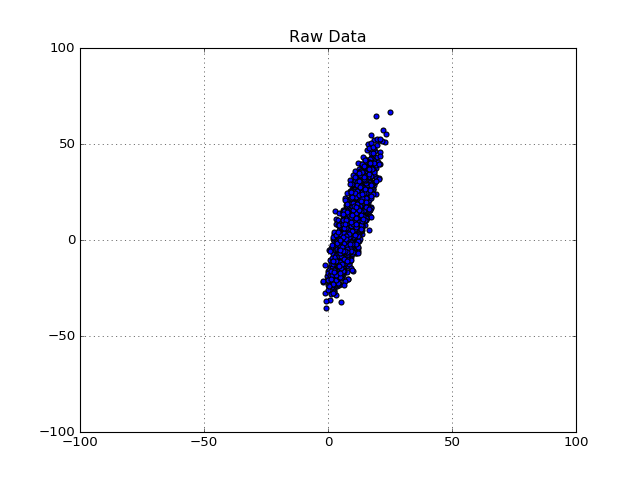

In [2]:
np.random.seed(123)
n_samples = 2000
mean_matrix = [10,10]
cov_matrix = [[16,49],
              [49,225]]
x = np.random.multivariate_normal(mean=mean_matrix, cov=cov_matrix, size=n_samples)

plt.figure()
plt.grid()
plt.title("Raw Data")
plt.scatter(x[:,0], x[:, 1])
plt.xlim((-100, 100))
plt.ylim((-100, 100))
plt.show()

# Mean subtract the data
Mean subtracting the data has a few advantages that are mentioned below and they will help us later on.
- Covariance matrix of mean-subtracted matrix is symmetric.
- There exist a set of eigen vectors of symmetric maatrix that are mutually orthogonal.

<IPython.core.display.Javascript object>


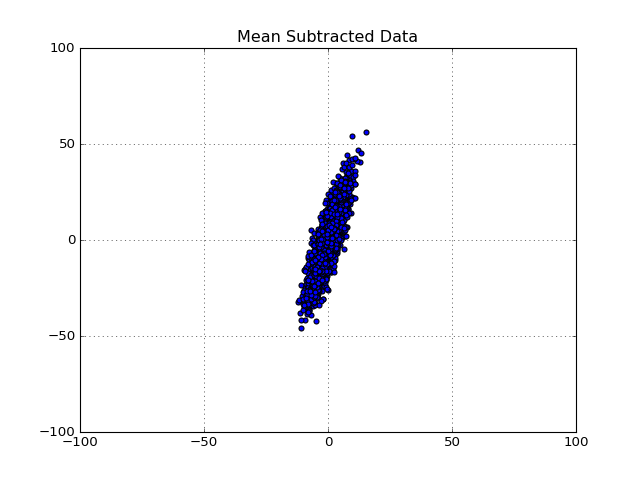

In [3]:
x_ms = x - np.mean(x, axis=0)

plt.figure()
plt.grid()
plt.title("Mean Subtracted Data")
plt.scatter(x_ms[:, 0], x_ms[:, 1])
plt.xlim((-100, 100))
plt.ylim((-100, 100))
plt.show()

# Performing 2 experiments

## Experiment 1 (Covariance w.r.t features $X^{T} X$)
To experimentally check that the eigen vectors of the (feature) covariance matrix $X^{T} X$of matrix X is the same as the V matrix obtained from the SVD of X.

**Singular Value Decomposition of X**  
$ X = U \Sigma V^{T} $  

** Multiplying $X^{T}$ on both sides **  
$ X^{T} X = X^{T} U \Sigma V^{T} $  
$ X^{T} X = (U \Sigma V^{T})^{T} U \Sigma V^{T} $  
$ X^{T} X = V \Sigma U^{T} U \Sigma V^{T} $  
$ X^{T} X = V \Sigma \Sigma V^{T} $  
$ X^{T} X = V \Sigma^{2} V^{T} $  

The above resembles the form of SVD($X^{T} X$) where the unitary matrix of $X$ i.e. matrix $V$ are the eigen vectors of the (feature) covariance matrix $X^{T} X$



## Experiment 2 (Covariance w.r.t samples $X X^{T}$)
To experimentally check that the eigen vectors of the (sample) covariance matrix $X X^{T}$of matrix X is the same as the U matrix obtained from the SVD of X.

**Singular Value Decomposition of X**  
$ X = U \Sigma V^{T} $  

** Multiplying $X^{T}$ on both sides **  
$ X X^{T} = U \Sigma V^{T} X^{T} $  
$ X X^{T} = U \Sigma V^{T} (U \Sigma V^{T})^{T} $  
$ X X^{T} = U \Sigma V^{T} V \Sigma U^{T} $  
$ X X^{T} = U \Sigma \Sigma U^{T} $  
$ X X^{T} = U \Sigma^{2} U^{T} $  

The above resembles the form of SVD($X X^{T}$) where the unitary matrix of $X$ i.e. matrix $U$ are the eigen vectors of the (sample) covariance matrix $X X^{T}$

## Overall
* **Findings**: The first `n_features` eigen values of both *feature_covariance_matrix* and *sample_covariance_matrix* found using `np.linalg.eigh` are the same.
* **Findings**: The covariance matrix has the shape `n_features x n_features`
* **Findings**: The eigen vectors of the feature covariance matrix of X are the same as the V matrix obtained from SVD of mean subtracted X.
* **ISSUE**: The absolute values are the same but the directions are opposite i.e. the values are negative to each other.
* **ISSUE**: Scikit-Learn's PCA decomposition does not yield the same eigen vectors.
* **NOTE**: Pay attention to the shape of the matrices that np.linalg.svd, np.linalg.eig and np.linalg.eig return.
* **NOTE**: Pay attention to the documentation of np.linalg.svd, np.linalg.eig and np.linalg.eig to know whether the eigen vectors that they return on on the columns or rows of the matrix.

# 1: Prove X's FEATURE COV Matrix Eigen Vectors == V of SVD(X)

## 1.1.a Calculate FEATURE Covariance Matrix (COV.shape = ndim x ndim)

In [4]:
x_feat_cov = np.dot(x_ms.T, x_ms) / n_samples
x_feat_cov

array([[  16.10052497,   49.5558029 ],
       [  49.5558029 ,  221.92561166]])

## 1.1.b Calculate the eigen vector of x_feat_cov

In [5]:
# Calculate normally using np.linalg.eigh
eval_feat_cov, evec_feat_cov = np.linalg.eigh(x_feat_cov)
evec_feat_cov = evec_feat_cov.T  # row is an eigen vector
sort_descending = np.argsort(eval_feat_cov)[::-1]

# Sort descending
eval_feat_cov = eval_feat_cov[sort_descending]
evec_feat_cov = evec_feat_cov[sort_descending]

pprint(np.sqrt(eval_feat_cov))
pprint(evec_feat_cov.shape)
pprint(evec_feat_cov)

array([ 15.27205039,   2.18874702])
(2, 2)
array([[ 0.22250453,  0.97493166],
       [-0.97493166,  0.22250453]])


## 1.2 Calculate V from SVD(X) which are "supposed" to be the the eigen vectors of x_feat_cov too but are calculated indirectly from the x_ms

In [6]:
u, s, v = np.linalg.svd(x_ms, full_matrices=True)
print("U", u.shape)
print("S", s.shape)
print("V", v.shape)
eval_feat_svd = s
evec_feat_svd = v
print("Sigma of SVD: \n{}".format(eval_feat_svd))
print("Eigen Vec of SVD: \n{}".format(evec_feat_svd))

('U', (2000, 2000))
('S', (2,))
('V', (2, 2))
Sigma of SVD: 
[ 682.98685655   97.88374248]
Eigen Vec of SVD: 
[[ 0.22250453  0.97493166]
 [ 0.97493166 -0.22250453]]


####  Comparing ccipy with numpy : (Both yield same results so we can ignore Scipy for now)

In [7]:
# from scipy import linalg

# u, s, v = linalg.svd(x_ms)
# print("U", u.shape)
# print("S", s.shape)
# print("V", v.shape)
# eval_feat_svd = s
# evec_feat_svd = v.T
# print("Sigma of SVD: \n{}".format(eval_feat_svd))
# print("Eigen Vec of SVD: \n{}".format(evec_feat_svd))

#### Checking if PCA of sklearn and eigen vectors of numpy are the same: (They are not and we will ignore sklearn as well)

In [8]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2, whiten=True)
# eigvecs = pca.fit_transform(x)
# eigvecs

## 1.2.1 Just making sure SVD can reconstruct original matrix X

In [9]:
S = np.zeros((u.shape[0], v.shape[1]), dtype=complex)
S[:v.shape[1], :v.shape[1]] = np.diag(s)

reconstructed = np.dot(u, np.dot(S, v))
np.allclose(x_ms, reconstructed)

True

## 1.3 Compare both eigen vectors

In [10]:
for evec_cov, evec_svd in zip(evec_feat_cov, evec_feat_svd):
    assert np.allclose(np.abs(evec_cov), np.abs(evec_svd))
else:
    print("Both are equal")

Both are equal


## 1.4 Plot The eigen vectors

<IPython.core.display.Javascript object>


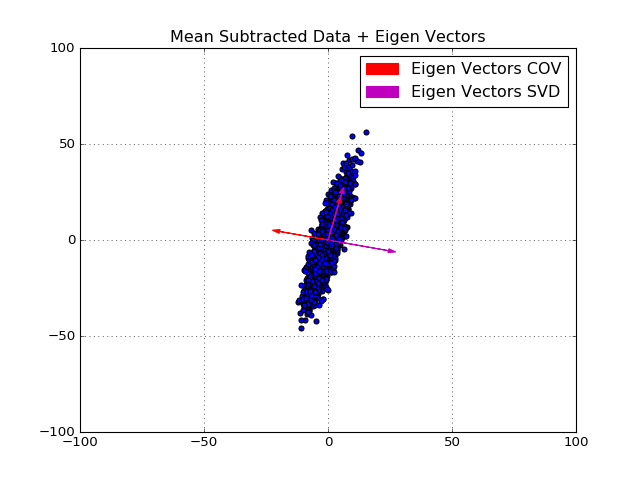

In [11]:
plt.figure()
plt.grid()
plt.title("Mean Subtracted Data + Eigen Vectors")
plt.scatter(x_ms[:, 0], x_ms[:, 1])
for evec in evec_feat_cov * 20:
    a1 = plt.arrow(0, 0, evec[0], evec[1], head_width=2, color='r')
for evec in evec_feat_svd * 25:
    a2 = plt.arrow(0, 0, evec[0], evec[1], head_width=2, color='m')
plt.legend([a1, a2], ['Eigen Vectors COV', 'Eigen Vectors SVD'])
plt.xlim((-100, 100))
plt.ylim((-100, 100))
plt.show()

**NOTE**: You may notice that the directions of the resulting eigen vectors from the covariance matrix and the unitary vectors from SVD will be different on different runs. However this inconsistency is unfortuantely expected behavior.

# 2: Prove X's SAMPLE COV Matrix Eigen Vectors == U of SVD(X)

## 2.1.a Calculate SAMPLE Covariance Matrix (COV.shape = n_samples x n_samples)

In [12]:
x_samp_cov = np.dot(x_ms, x_ms.T) / n_samples
# Assert Symmetric
assert np.all(x_samp_cov == x_samp_cov.T), "Not Symmetric"
print(x_samp_cov.shape)
print(x_samp_cov[:3, :3])

(2000, 2000)
[[ 0.13912637 -0.04084488  0.07633314]
 [-0.04084488  0.01605993 -0.02594475]
 [ 0.07633314 -0.02594475  0.04495193]]


## 2.1.a Calculate the eigen vector of x_sample_cov

In [13]:
# Calculate normally using np.linalg.eigh
eval_samp_cov, evec_samp_cov = np.linalg.eigh(x_samp_cov)
sort_descending = np.argsort(eval_samp_cov)[::-1]

# Sort descending
eval_samp_cov = eval_samp_cov[sort_descending]
evec_samp_cov = evec_samp_cov[:, sort_descending]

pprint(eval_samp_cov.shape)
pprint(eval_samp_cov[:4].astype(float))
pprint(evec_samp_cov.shape)
pprint(evec_samp_cov[:4, :4].astype(float))

(2000,)
array([  2.33235523e+02,   4.79061352e+00,   1.35162353e-13,
         1.32346044e-13])
(2000, 2000)
array([[ -2.41978566e-02,   2.31099210e-02,  -4.27606587e-04,
          0.00000000e+00],
       [  6.53764351e-03,  -3.56580999e-02,  -9.27813125e-02,
          1.59269950e-02],
       [ -1.27843349e-02,   3.77643135e-02,  -7.12555596e-02,
          1.69597800e-02],
       [ -5.43804050e-02,  -8.65386807e-03,   6.15673715e-01,
          5.88838735e-03]])


In [14]:
# Calculate normally using np.linalg.eig
eval_samp_cov, evec_samp_cov = np.linalg.eig(x_samp_cov)
sort_descending = np.argsort(eval_samp_cov)[::-1]

# Sort descending
eval_samp_cov = eval_samp_cov[sort_descending]
evec_samp_cov = evec_samp_cov[:, sort_descending]

pprint(eval_samp_cov[:4].astype(float))
pprint(evec_samp_cov.shape)
pprint(evec_samp_cov[:4, :4].astype(float))

array([  2.33235523e+02,   4.79061352e+00,   2.53329321e-14,
         1.72003960e-14])
(2000, 2000)
array([[-0.02419786, -0.02310992, -0.00217217,  0.01559135],
       [ 0.00653764,  0.0356581 , -0.00182511, -0.01084618],
       [-0.01278433, -0.03776431,  0.01650334,  0.00181974],
       [-0.0543804 ,  0.00865387,  0.04677409, -0.0309009 ]])


/home/nitish/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
/home/nitish/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: ComplexWarning: Casting complex values to real discards the imaginary part


## 2.2 Calculate U from SVD(X) which are "supposed" to be the the eigen vectors of x_sample_cov too but are calculated indirectly from the x_ms

In [15]:
u, s, v = np.linalg.svd(x_ms, full_matrices=True)
print("U", u.shape)
print("S", s.shape)
print("V", v.shape)
eval_samp_svd = s
evec_samp_svd = u
print("Sigma of SVD: \n{}".format(eval_samp_svd))
print("Eigen Vec of SVD: \n{}".format(evec_samp_svd[:4, :4]))

('U', (2000, 2000))
('S', (2,))
('V', (2, 2))
Sigma of SVD: 
[ 682.98685655   97.88374248]
Eigen Vec of SVD: 
[[  2.41978566e-02  -2.31099210e-02   7.52323228e-03  -5.15405542e-02]
 [ -6.53764351e-03   3.56580999e-02   3.91781757e-02   1.92746576e-02]
 [  1.27843349e-02  -3.77643135e-02   9.98454205e-01  -2.81108124e-04]
 [  5.43804050e-02   8.65386807e-03  -3.76319805e-04   9.97025141e-01]]


## 2.3 Compare both eigen vectors
### NOTE: Seems like only the first 2 eigen vectors are equal since the 3rd to 2000th eigen values are nearing zero.

In [16]:
for i, (evec_cov, evec_svd) in enumerate(zip(evec_samp_cov[:, :2], evec_samp_svd[:, :2])):
    assert np.allclose(np.abs(evec_cov), np.abs(evec_svd), rtol=0.1)
else:
    print("Both are equal")

Both are equal
